In [1]:
"""
Download AQBurk data from server and loads it into a Pandas DataFrame.
"""

# Import libraries
import os
import gzip
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = [15, 5]


# Get one month's sample data
baseurl = 'https://broker.fvh.io/static/aqburk/'
index_json = f'{baseurl}index.json'
res = requests.get(index_json)
files = res.json()
datafile = files[6]  # Take just one of all files

# Cache file locally
if os.path.isfile(datafile):
    print(f'{datafile} is already downloaded')
else:
    dataurl = f'{baseurl}{datafile}'
    res = requests.get(dataurl)
    with open(datafile, 'wb') as f:
        f.write(res.content)
    print(f'Saved {datafile} locally')

aqburk-20190601T000000Z-20190701T000000Z.csv.gz is already downloaded


In [2]:
# Load data into Dataframe from locally cached file
usecols = ['readable_time', 'gas', 'humi', 'pm10avg', 'pm10max', 'pm10med', 'pm10min', 
           'pm25avg', 'pm25max', 'pm25med', 'pm25min', 'pres', 'rssi', 'temp', 'dev-id']
dtypes = {'gas': 'float', 'humi': 'float', 'pm10avg': 'float', 'pm10max': 'float', 
          'pm10med': 'float', 'pm10min': 'float', 'pm25avg': 'float', 'pm25max': 'float', 
          'pm25med': 'float', 'pm25min': 'float', 'pres': 'float', 'rssi': 'int', 
          'temp': 'float', 'dev-id': 'str'}

df = pd.read_csv(datafile, compression='gzip', header=0, 
                 usecols=usecols, dtype=dtypes,
                 parse_dates=['readable_time'], sep=',')
df.rename(columns={"readable_time": "time"}, inplace=True)
df

,time,gas,humi,pm10avg,pm10max,pm10med,pm10min,pm25avg,pm25max,pm25med,pm25min,pres,rssi,temp,dev-id
0,2019-06-01 00:00:02.759000+00:00,710.5,68.7,5.4,7.5,5.1,3.8,2.5,2.7,2.5,2.5,1003.2,-107,13.3,373773207E330112
1,2019-06-01 00:00:03.676000+00:00,552.9,61.0,4.9,5.8,4.9,4.4,2.5,2.6,2.5,2.4,1013.7,-93,13.1,373773207E330100
2,2019-06-01 00:00:03.896000+00:00,281.6,79.5,5.7,6.9,5.6,4.6,2.6,2.8,2.7,2.4,1015.5,-96,10.7,373773207E330129
3,2019-06-01 00:00:06.318000+00:00,196.1,85.1,6.3,7.7,6.3,5.0,3.2,3.5,3.3,2.9,1016.3,-95,9.6,373773207E330120
4,2019-06-01 00:00:08.311000+00:00,238.5,70.5,6.0,9.3,5.8,4.1,2.3,2.5,2.4,2.2,1006.9,-84,14.7,373773207E330116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356785,2019-06-30 23:57:38.089000+00:00,NaN,NaN,950.3,955.6,951.1,945.4,888.2,893.3,889.1,883.6,NaN,-103,NaN,373773207E330002
1356786,2019-06-30 23:57:39+00:00,505.5,60.1,5.5,6.6,5.5,3.9,2.9,3.2,3.0,2.7,992.1,-87,19.2,373773207E330109
1356787,2019-06-30 23:57:45.732000+00:00,337.3,77.4,4.5,4.9,4.5,4.1,3.0,3.3,3.1,2.7,996.9,-96,17.2,373773207E330123
1356788,2019-06-30 23:57:47.228000+00:00,NaN,NaN,3.9,5.1,4.0,2.2,2.0,2.4,2.1,1.9,NaN,-112,NaN,373773207E330003


In [3]:
one = df[df['dev-id'] == '373773207E330120']
one

,time,gas,humi,pm10avg,pm10max,pm10med,pm10min,pm25avg,pm25max,pm25med,pm25min,pres,rssi,temp,dev-id
3,2019-06-01 00:00:06.318000+00:00,196.1,85.1,6.3,7.7,6.3,5.0,3.2,3.5,3.3,2.9,1016.3,-95,9.6,373773207E330120
40,2019-06-01 00:01:12.325000+00:00,192.1,85.0,5.9,7.5,5.7,4.7,2.9,3.4,3.0,2.7,1016.4,-97,9.6,373773207E330120
76,2019-06-01 00:02:19.105000+00:00,195.3,84.7,5.7,7.5,5.8,4.6,3.1,3.5,3.2,3.0,1016.4,-93,9.6,373773207E330120
111,2019-06-01 00:03:24.716000+00:00,195.8,84.5,8.0,10.2,8.0,6.0,3.2,3.4,3.2,3.0,1016.4,-93,9.6,373773207E330120
145,2019-06-01 00:04:30.117000+00:00,199.9,84.6,6.7,8.7,6.5,4.8,3.3,3.5,3.3,3.0,1016.4,-95,9.6,373773207E330120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356591,2019-06-30 23:51:23.096000+00:00,218.3,80.9,5.4,6.4,5.4,4.5,3.2,3.5,3.2,3.0,997.0,-94,16.6,373773207E330120
1356626,2019-06-30 23:52:28.759000+00:00,224.3,80.7,5.4,6.8,5.6,4.2,3.4,3.7,3.4,3.2,997.0,-90,16.7,373773207E330120
1356660,2019-06-30 23:53:34.392000+00:00,230.3,80.5,5.3,6.1,5.5,4.6,3.4,3.8,3.5,3.2,996.9,-92,16.7,373773207E330120
1356692,2019-06-30 23:54:36.712000+00:00,233.4,80.7,4.7,5.3,4.7,4.3,3.5,3.7,3.5,3.2,996.9,-93,16.7,373773207E330120


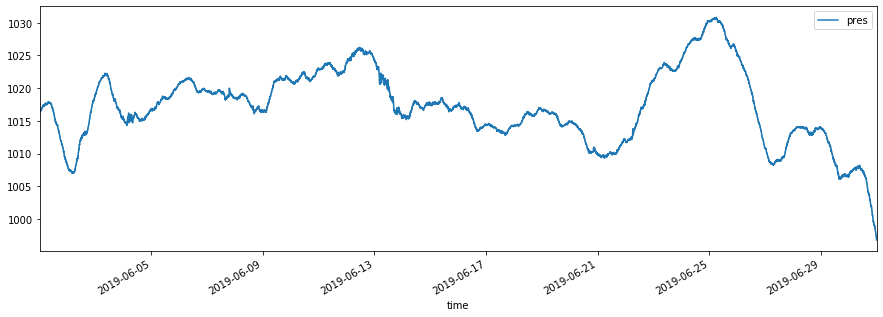

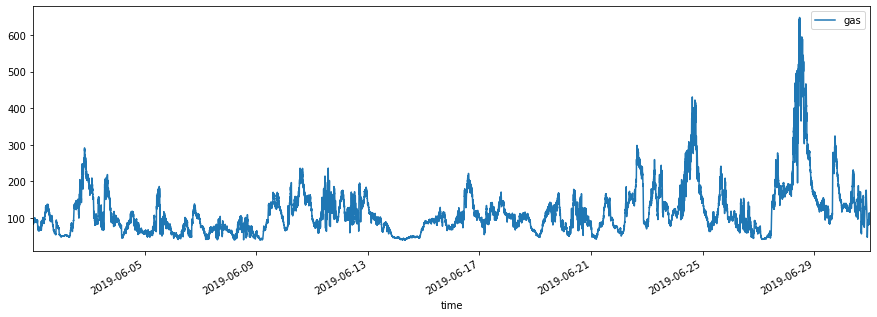

In [6]:
one.plot(x='time', y='pres', figsize=(15,5))
df[df['dev-id'] == '373773207E330121'].plot(x='time', y='gas', figsize=(15,5))
plt.show()